In [6]:
import pandas as pd
import time

#Creating an empty data frame to put values in
df = pd.DataFrame()

In [7]:
#Using time to track how long it takes
start = time.time()

WEEKLY_BASE_URL = "https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/{year}/week{week}.csv"

year = 2019 # Able to be changed

#Iterrating from week 1 to week 17 and using pd.concat to combine data frames 
for week in range(1, 18):
    weekly_df = pd.read_csv(WEEKLY_BASE_URL.format(year=year, week=week))
    weekly_df['Week'] = week
    df = pd.concat([df, weekly_df])

    seconds = time.time() - start

    print(f'Added data for week {week}, {seconds} seconds have passed.') # track our progress
    
print(df.shape)
df.head()

Added data for week 1, 0.27550745010375977 seconds have passed.
Added data for week 2, 0.4911017417907715 seconds have passed.
Added data for week 3, 0.7048602104187012 seconds have passed.
Added data for week 4, 0.9091377258300781 seconds have passed.
Added data for week 5, 1.106055498123169 seconds have passed.
Added data for week 6, 1.3079655170440674 seconds have passed.
Added data for week 7, 1.527127742767334 seconds have passed.
Added data for week 8, 1.735109806060791 seconds have passed.
Added data for week 9, 2.013955593109131 seconds have passed.
Added data for week 10, 2.2196011543273926 seconds have passed.
Added data for week 11, 2.4147863388061523 seconds have passed.
Added data for week 12, 2.7217328548431396 seconds have passed.
Added data for week 13, 2.910278558731079 seconds have passed.
Added data for week 14, 3.119983673095703 seconds have passed.
Added data for week 15, 3.31247615814209 seconds have passed.
Added data for week 16, 3.533719539642334 seconds have p

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40,1
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10,1
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32,1
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32,1


In [8]:
#The unique method of the Pos series will find the unique values for our Pos column.
df['Pos'].unique()

array(['QB', 'WR', 'RB', 'DB/LB', 'HB', 'TE', 'FB', 'WR/RS', 'WR/PR',
       'FB/DL', 'C', 'CB', 'DB', 'OL', 'G/C', 'S', 'FB/TE', 'K', 'T', 'P',
       'FS', 'G', 'CB/RS', 'C/G', 'LS', 'G/T', 'LB', 'T/G', 'DL', 'FB/RB',
       'DT'], dtype=object)

In [9]:
#Rename the columns. HB = RB and other values are confusing so we can be consistent. Creating a dictionary Pos and then
#another diction for POS to replace the values with.
df = df.replace({
        'Pos': {
        'HB': 'RB',
        'WR/RS': 'WR',
        'WR/PS': 'WR',
        'FB/TE': 'TE',
        'FB/HB': 'RB'
    }
})

In [11]:
#Removing positions that we do not need in this data frame such as LB/DB etc.
skill_positions = ['QB', 'WR', 'TE', 'RB']

df = df.loc[df['Pos'].isin(skill_positions)]

df.shape

(4605, 20)

In [13]:
#Using numpy to help with agg fuction. Numpy runs faster than pandas. Resetting the index so it does not use the old one. 
import numpy as np

columns = ['Player', 'Tm', 'Pos', 'Week', 'PPRFantasyPoints']

#Setting out new df to the columns above
new_df = df[columns]

#Getting unique players for the group
new_df = new_df.groupby(['Player', 'Tm', 'Pos'], as_index=False).agg({
    'PPRFantasyPoints': np.mean # calculating the mean for FantasyPoints per game vlaues
})

new_df.head()


,Player,Tm,Pos,PPRFantasyPoints
0,A.J. Brown,TEN,WR,13.568750
1,A.J. McCarron,HOU,QB,8.450000
2,Aaron Jones,GNB,RB,19.675000
3,Aaron Rodgers,GNB,QB,17.023750
4,Adam Humphries,TEN,WR,7.208333


In [14]:
#How many players do we want for each position?
position_map = {
    'QB': 1, 
    'RB': 2, 
    'WR': 3, 
    'TE': 2 
}

def get_top_n_player_at_each_position(df, pos, n):
    
    df = df.loc[df['Pos'] == pos]
    
    """
    For each group, grab the nlargest FantasyPoints for the position
    given the n argument set.
    
    For example, to find the WR3 of a team:
    
    Set n=3 and pos=WR
    
    The nlargest function will get us back the top 3WRs in terms of FantasyPoints
    
    To grab the WR3, get the smallest FantasyPoints output from the group (using the min function)
    
    """
    
    return df.groupby('Tm', as_index=False).apply(
        lambda x: x.nlargest(n, ['PPRFantasyPoints']).min()
    )

corr_df = pd.DataFrame(columns=columns) # initialize an empty DataFrame with our columns we initialized in the cell above

"""
Iterate over every position. For each position, also iterate over the range of 1 -> n + 1
For example, in the case of WR, we are going to iterate from WR1 -> WR3 and concatenate the values column wise
"""

for pos, n_spots in position_map.items():
    
    for n in range(1, n_spots + 1):
        
        pos_df = get_top_n_player_at_each_position(new_df, pos, n)
        
        """
        Rename the columns
        """
        pos_df = pos_df.rename({'PPRFantasyPoints': f'{pos}{n}'}, axis=1)
        
        """
        To concatenate column wise, you can use axis=1. Not specifying an axis just concatenates by rows
        """
        
        corr_df = pd.concat([corr_df, pos_df], axis=1)
        
corr_df = corr_df.dropna(axis=1) # Setting axis=1 drops those columns with NA values.
corr_df = corr_df.drop(['Pos', 'Player', 'Tm'], axis=1)

print(corr_df.shape)
corr_df.head(32)


(32, 8)


,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
0,17.455000,19.675000,11.791667,12.784615,11.087500,7.190000,9.400000,3.433333
1,17.689333,14.114286,6.720000,18.273333,15.000000,10.250000,14.592308,5.980000
2,27.712000,15.900000,5.787500,10.457143,6.350000,6.340000,13.813333,5.364286
3,17.660000,12.325000,7.425000,14.654667,12.053333,8.650000,6.466667,5.692857
4,13.652308,29.325000,6.100000,15.366667,10.731250,4.650000,9.515385,5.933333
5,13.388000,10.650000,10.243750,15.931250,10.033333,9.107143,4.825000,4.475000
6,15.358462,14.087500,4.275000,13.931250,11.875000,8.458333,9.300000,6.537500
7,14.198750,15.950000,12.675000,14.837500,12.581250,6.333333,8.414286,7.550000
8,20.986250,19.481250,6.228571,16.433333,15.192857,11.150000,8.618750,6.107143
9,13.600000,12.356250,8.887500,13.901250,11.242857,6.370000,6.937500,4.485714


In [15]:
#Creating a correlation matrix
corr_df.corr()

,QB1,RB1,RB2,WR1,WR2,WR3,TE1,TE2
QB1,1.000000,0.044938,-0.112497,0.241035,0.059262,0.081643,0.362318,0.025410
RB1,0.044938,1.000000,-0.042164,-0.043518,-0.157875,-0.338931,0.070147,0.027894
RB2,-0.112497,-0.042164,1.000000,0.193259,0.006101,-0.222082,0.006057,-0.086603
WR1,0.241035,-0.043518,0.193259,1.000000,0.399394,0.222120,0.130273,0.093402
WR2,0.059262,-0.157875,0.006101,0.399394,1.000000,0.637070,0.008109,0.324686
WR3,0.081643,-0.338931,-0.222082,0.222120,0.637070,1.000000,-0.055469,0.301889
TE1,0.362318,0.070147,0.006057,0.130273,0.008109,-0.055469,1.000000,0.381656
TE2,0.025410,0.027894,-0.086603,0.093402,0.324686,0.301889,0.381656,1.000000


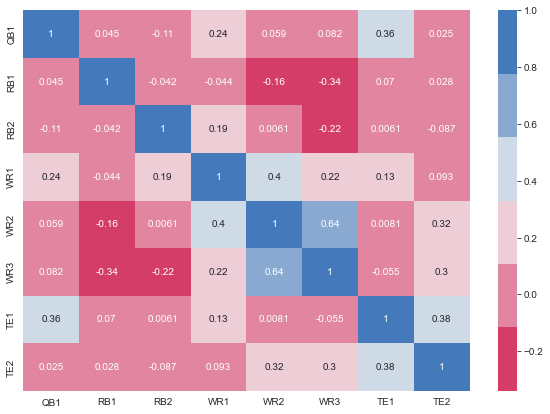

In [16]:
#Graphing a heatmap to show the correlations. A diverging palette allows us better control of colors
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid');

plt.figure(figsize=(10, 7))

sns.heatmap(corr_df.corr(), annot=True, cmap=sns.diverging_palette(0, 250));
